<a href="https://colab.research.google.com/github/AmonKi/Twitter-Data-Analysis/blob/fix_bug/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data2=pd.read_csv("clean_tweet.csv")

In [ ]:
data2.head(5)

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,NaN,NaN,Mass
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,NaN,NaN,"Edinburgh, Scotland"
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,NaN,NaN,NaN
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,NaN,NaN,NaN
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,NaN,NaN,United Kingdom


In [ ]:
data2.describe()

,Unnamed: 0,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count,hashtags,user_mentions
count,6532.000000,6532.000000,6532.000000,6532.000000,4785.000000,6.532000e+03,6532.000000,0.0,0.0
mean,3265.500000,0.082598,0.253671,242.896050,173.269801,1.649915e+04,1707.652021,NaN,NaN
std,1885.770311,0.174333,0.275541,617.588401,288.354650,2.597877e+05,5148.761957,NaN,NaN
min,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,NaN,NaN
25%,1632.750000,0.000000,0.000000,0.000000,7.000000,8.900000e+01,162.000000,NaN,NaN
50%,3265.500000,0.000000,0.188889,28.000000,53.000000,4.545000e+02,560.500000,NaN,NaN
75%,4898.250000,0.166667,0.455556,309.000000,233.000000,1.769000e+03,1765.000000,NaN,NaN
max,6531.000000,1.000000,1.000000,20527.000000,6847.000000,1.366658e+07,237298.000000,NaN,NaN


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6532 non-null   int64  
 1   created_at          6532 non-null   object 
 2   source              6532 non-null   object 
 3   original_text       3720 non-null   object 
 4   polarity            6532 non-null   float64
 5   subjectivity        6532 non-null   float64
 6   lang                4785 non-null   object 
 7   favorite_count      6532 non-null   int64  
 8   retweet_count       4785 non-null   float64
 9   original_author     6532 non-null   object 
 10  followers_count     6532 non-null   int64  
 11  friends_count       6532 non-null   int64  
 12  possibly_sensitive  1518 non-null   object 
 13  hashtags            0 non-null      float64
 14  user_mentions       0 non-null      float64
 15  place               4088 non-null   object 
dtypes: flo

In [ ]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6532.0,3265.500000,1885.770311,0.0,1632.75,3265.500000,4898.250000,6531.0
polarity,6532.0,0.082598,0.174333,-1.0,0.00,0.000000,0.166667,1.0
subjectivity,6532.0,0.253671,0.275541,0.0,0.00,0.188889,0.455556,1.0
favorite_count,6532.0,242.896050,617.588401,0.0,0.00,28.000000,309.000000,20527.0
retweet_count,4785.0,173.269801,288.354650,1.0,7.00,53.000000,233.000000,6847.0
followers_count,6532.0,16499.150949,259787.718966,0.0,89.00,454.500000,1769.000000,13666575.0
friends_count,6532.0,1707.652021,5148.761957,0.0,162.00,560.500000,1765.000000,237298.0
hashtags,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_mentions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
# importing packages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
# text_category function

def text_category(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

In [5]:
# polarity

file_name = 'clean_tweet.csv'
df = pd.read_csv(file_name)

# see polarity
df['polarity']

# see polarity
df['polarity']

0       0.166667
1       0.133333
2       0.316667
3       0.086111
4       0.280000
          ...   
6527    0.000000
6528    0.086111
6529    0.000000
6530    0.125000
6531    0.000000
Name: polarity, Length: 6532, dtype: float64

In [6]:
cleanTweets = df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleanTweets.head()
cleanTweets['clean_text'].isnull().sum()

2812

In [7]:
# polarity column

cleanTweets['score'] = cleanTweets["polarity"].map(text_category)
cleanTweets['score'].value_counts()

neutral     3178
positive    2786
negative     568
Name: score, dtype: int64

In [8]:
cleanTweets.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


Accuracy is probably the simplest performance metrics.
Accuracy value lies between 0 and 1. If the value is closer to 0 it's considered as bad performance, whereas if the value is closer to 1 then its considered good performance. It is one of the simplest and easy to understand metric.


In [ ]:
why_metrics = '''Assessment for the performance is vital in predicting the outcome later. And accuracy defines the closeness to the truth.'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

In [ ]:
how_success = '''The metric used above is a measure of how successful prediction is. An accuracy of greater percentages shows that the model is more accurate and useful in prediction.'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

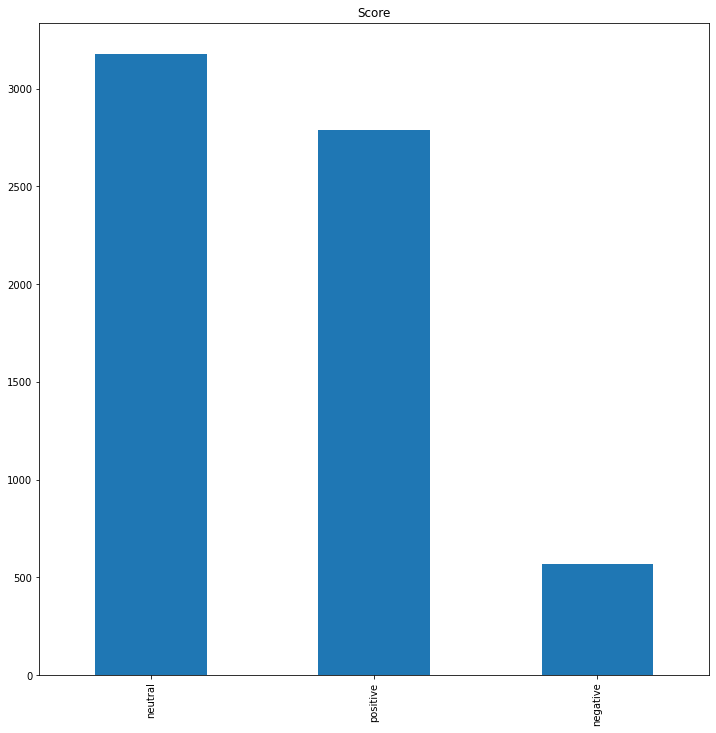

In [9]:
# visualizing using barchart
score_count = cleanTweets['score'].value_counts()
score_count.plot(kind="bar", y="score", title="Score", figsize=[12, 12])

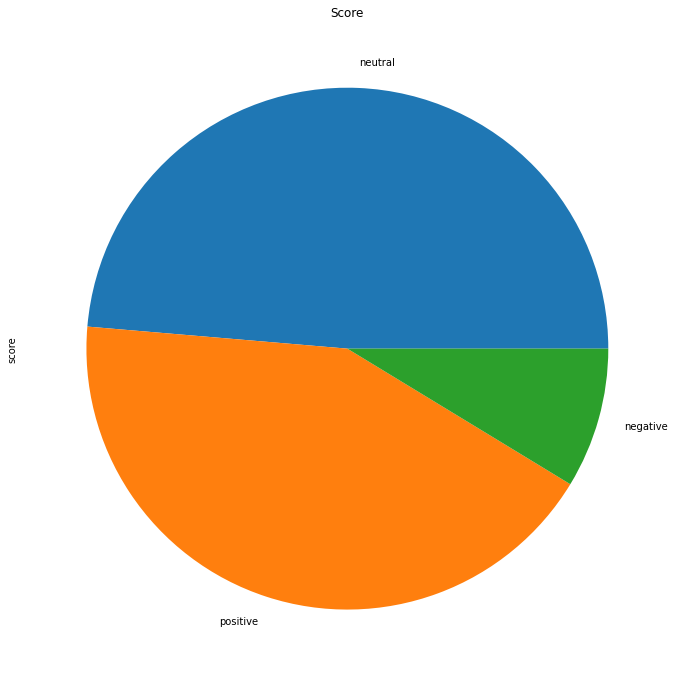

In [10]:
# visualizing with PieChart
score_count = cleanTweets['score'].value_counts()
score_count.plot(kind="pie", y="score", title="Score", figsize=[12, 12])

In [11]:
#Remove rows from cleanTweets where the score is neutral
cleanTweets = cleanTweets[cleanTweets['polarity'] != 0]

# reset frame index
cleanTweets.reset_index(drop=True, inplace=True)
cleanTweets.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [12]:
# A column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    return 1 if (value == 'positive') else 0

cleanTweets['scoremap'] = cleanTweets['score'].map(get_score)
cleanTweets.head()
cleanTweets['scoremap'].value_counts()

1    2786
0     568
Name: scoremap, dtype: int64

In [15]:
# Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.
X = cleanTweets['clean_text']
y = cleanTweets['scoremap']

x_train, x_test, y_train, y_test = train_test_split(X, y)
cv = CountVectorizer(ngram_range=(3, 3))
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)
X_train_cv

<2515x16178 sparse matrix of type '<class 'numpy.int64'>'
	with 97551 stored elements in Compressed Sparse Row format>

In [16]:
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)
results = confusion_matrix(y_test, predictions) 
results

array([[131,  14],
       [  0, 694]])

In [17]:
accuracy_score(y_test, predictions)

0.9833134684147795

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       145
           1       0.98      1.00      0.99       694

    accuracy                           0.98       839
   macro avg       0.99      0.95      0.97       839
weighted avg       0.98      0.98      0.98       839

